In [1]:
import pandas as pd

df = pd.read_excel('https://iea.blob.core.windows.net/assets/6296011e-4fed-40c3-95a0-1367a4c4484a/CO2Highlights2020.xls',
                   'CO2 FC', header=23, usecols=[0, 47, 48, 49], na_values='..')
df.columns = df.columns.astype(str)
df = df.round({'2017' : 2, '2018' : 2, '2019' : 2})
df2 = df[df['Region/Country/Economy'].str.contains('OECD')==False]
df2 = df2.drop(df2.index[152:163])
df2 = df2.sort_values('Region/Country/Economy', ascending=True)
df2.reset_index(drop=True, inplace=True)
##df2['Country Code'] = np.where(df2['Region/Country/Economy'] == data['Country Code'])
##my_list = list(df)
##print(my_list)
df2

,Region/Country/Economy,2017,2018,2019
0,Africa,1204.03,1244.89,NaN
1,Albania,4.34,4.30,NaN
2,Algeria,130.53,137.28,NaN
3,Angola,18.88,18.80,NaN
4,Argentina,173.93,171.16,NaN
...,...,...,...,...
147,Venezuela,123.35,112.59,NaN
148,Viet Nam,191.24,226.52,NaN
149,Yemen,8.67,8.01,NaN
150,Zambia,5.95,6.69,NaN


<AxesSubplot:xlabel='2018', ylabel='Region/Country/Economy'>

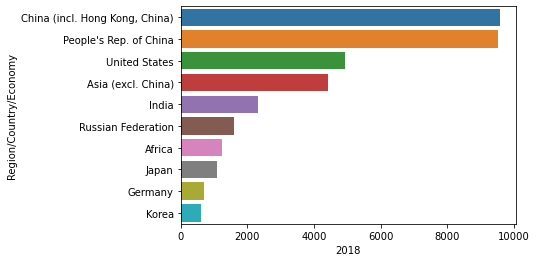

In [2]:
import seaborn as sns

df3 = df2
df3 = df3.sort_values(by='2018', ascending=False)
top = df3[:10]
sns.barplot(x=top['2018'], y=top['Region/Country/Economy'])


In [3]:
import pycountry
## match country names in data to pycountry library

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3


In [4]:
##try to keep only countries not regions

df2['Code'] = [countries.get(country) for country in df2['Region/Country/Economy']]
df2

,Region/Country/Economy,2017,2018,2019,Code
0,Africa,1204.03,1244.89,NaN,None
1,Albania,4.34,4.30,NaN,ALB
2,Algeria,130.53,137.28,NaN,DZA
3,Angola,18.88,18.80,NaN,AGO
4,Argentina,173.93,171.16,NaN,ARG
...,...,...,...,...,...
147,Venezuela,123.35,112.59,NaN,None
148,Viet Nam,191.24,226.52,NaN,VNM
149,Yemen,8.67,8.01,NaN,YEM
150,Zambia,5.95,6.69,NaN,ZMB


In [5]:
## check where na

navals = df2['Code'].isna()
navals[navals].index

Int64Index([  0,   6,  15,  25,  26,  34,  36,  37,  48,  49,  60,  67,  75,
             76, 103, 104, 108, 114, 115, 122, 132, 143, 147],
           dtype='int64')

In [6]:
df2.at[15, 'Code'] = 'BOL'


In [7]:
df2.at[26, 'Code'] = 'TWN'
df2.at[34, 'Code'] = 'CZE'
df2.at[37, 'Code'] = 'COD'
df2.at[67, 'Code'] = 'IRN'
df2.at[75, 'Code'] = 'KOR'
df2.at[108, 'Code'] = 'CHN'
df2.at[114, 'Code'] = 'MDA'
df2.at[122, 'Code'] = 'SVK'
df2.at[132, 'Code'] = 'SYR'
df2.at[143, 'Code'] = 'TZA'
df2.at[147, 'Code'] = 'VEN'
df2[df2.index == 147]

,Region/Country/Economy,2017,2018,2019,Code
147,Venezuela,123.35,112.59,NaN,VEN


In [8]:
df = df2.dropna(subset=['Code'])
df = df.rename(columns={'Region/Country/Economy' : 'Country'})
df

,Country,2017,2018,2019,Code
1,Albania,4.34,4.30,NaN,ALB
2,Algeria,130.53,137.28,NaN,DZA
3,Angola,18.88,18.80,NaN,AGO
4,Argentina,173.93,171.16,NaN,ARG
5,Armenia,5.17,5.39,NaN,ARM
...,...,...,...,...,...
147,Venezuela,123.35,112.59,NaN,VEN
148,Viet Nam,191.24,226.52,NaN,VNM
149,Yemen,8.67,8.01,NaN,YEM
150,Zambia,5.95,6.69,NaN,ZMB


<AxesSubplot:xlabel='2018', ylabel='Country'>

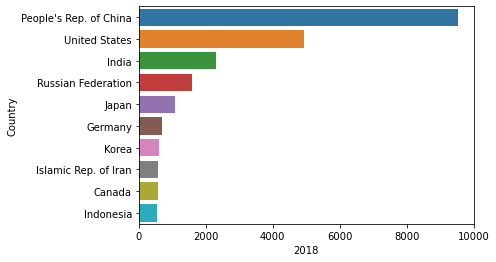

In [9]:
df = df.sort_values(by='2018', ascending=False)
top = df[:10]
sns.barplot(x=top['2018'], y=top['Country'])

<AxesSubplot:xlabel='2018', ylabel='Country'>

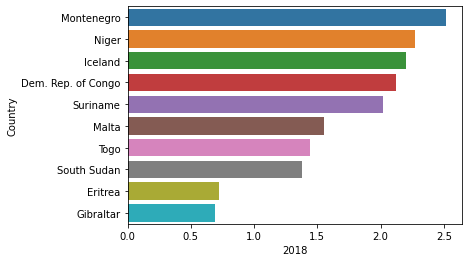

In [10]:
bottom = df[-10:]
sns.barplot(x=bottom['2018'], y=bottom['Country'])

In [11]:
print(df.describe())

              2017         2018         2019
count   141.000000   141.000000    39.000000
mean    222.690142   227.292553   611.701282
std     900.871606   928.851680  1725.069337
min       0.630000     0.690000     1.890000
25%       7.790000     8.080000    32.250000
50%      30.400000    30.950000    90.600000
75%     123.350000   112.590000   380.055000
max    9245.580000  9528.210000  9809.200000


<AxesSubplot:>

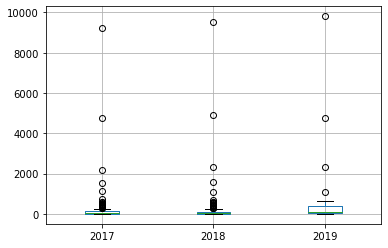

In [12]:
df.boxplot()

array([[<AxesSubplot:title={'center':'2017'}>,
        <AxesSubplot:title={'center':'2018'}>],
       [<AxesSubplot:title={'center':'2019'}>, <AxesSubplot:>]],
      dtype=object)

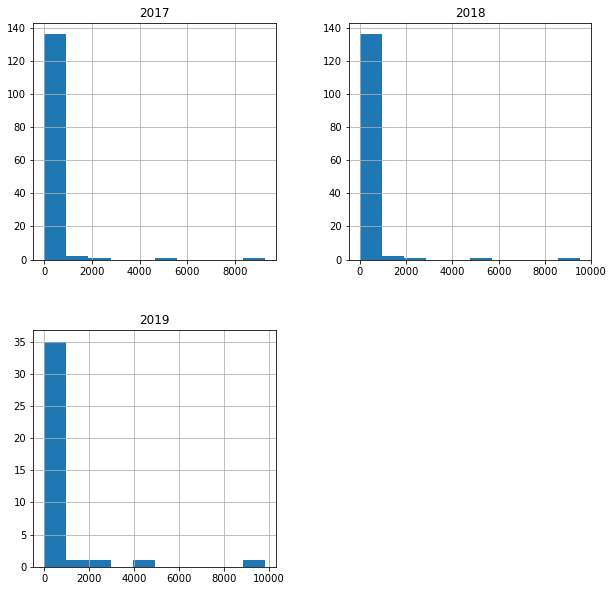

In [13]:
df.hist(figsize=(10,10))

# GRO data import

In [14]:
GRO = pd.read_excel('https://recovery.smithschool.ox.ac.uk/wp-content/uploads/2021/05/20210524-Global-Recovery-Observatory-publicv2.xlsx', sheet_name="COVID-19 Measures",
                  na_values=[".."], usecols={'Country', 'Total Value, USD (billions)', 'Clean archetype?', 'Recovery?'})
index = GRO[GRO['Recovery?'] != 1].index
rec = GRO.drop(index, inplace=False)
rec = rec.groupby(["Country"], as_index=False).sum()
rec = rec.drop(columns=['Recovery?', 'Clean archetype?'])

index2 = GRO[GRO['Clean archetype?'] != 1].index
greenrec = GRO.drop(index2, inplace=False)
index = greenrec[greenrec['Recovery?'] != 1].index
greenrec.drop(index, inplace=True)
greenrec = greenrec.groupby(["Country"], as_index=False).sum()
greenrec = greenrec.drop(columns=['Recovery?', 'Clean archetype?'])

In [15]:
merge = greenrec.merge(rec, how='left', left_on='Country', right_on='Country')
merge['Percent'] = (merge['Total Value, USD (billions)_x'] / merge['Total Value, USD (billions)_y']) * 100
merge.rename(columns = {"Total Value, USD (billions)_x" : "Green recovery spending", "Total Value, USD (billions)_y" : "Recovery spending"}, inplace=True)
merge = merge.round({"Percent" : 2})
merge

,Country,Green recovery spending,Recovery spending,Percent
0,Argentina,0.00,6.82,0.00
1,Australia,2.30,130.95,1.76
2,Austria,0.38,1.60,23.75
3,Bangladesh,0.55,0.63,87.30
4,Brazil,0.28,0.54,51.85
5,Burkina Faso,0.00,0.00,NaN
6,Canada,21.67,38.70,55.99
7,Chile,0.45,3.13,14.38
8,China,51.88,427.52,12.14
9,Colombia,0.15,0.32,46.88


In [25]:
df.at[108, 'Country'] = 'China'
df.at[75, 'Country'] = 'South Korea'
df.at[148, 'Country'] = 'Vietnam'

In [27]:
df[df['Code']=='VNM']

,Country,2017,2018,2019,Code
148,Vietnam,191.24,226.52,NaN,VNM


In [28]:
GROmerge = merge.merge(df, how='left', left_on='Country', right_on='Country')
GROmerge

,Country,Green recovery spending,Recovery spending,Percent,2017,2018,2019,Code
0,Argentina,0.00,6.82,0.00,173.93,171.16,NaN,ARG
1,Australia,2.30,130.95,1.76,383.79,382.88,388.70,AUS
2,Austria,0.38,1.60,23.75,64.12,61.47,62.75,AUT
3,Bangladesh,0.55,0.63,87.30,77.92,81.97,NaN,BGD
4,Brazil,0.28,0.54,51.85,428.05,406.25,406.45,BRA
5,Burkina Faso,0.00,0.00,NaN,NaN,NaN,NaN,NaN
6,Canada,21.67,38.70,55.99,553.07,565.23,571.82,CAN
7,Chile,0.45,3.13,14.38,86.14,85.72,94.21,CHL
8,China,51.88,427.52,12.14,9245.58,9528.21,9809.20,CHN
9,Colombia,0.15,0.32,46.88,69.47,73.08,NaN,COL


array([[<AxesSubplot:xlabel='Green recovery spending', ylabel='Green recovery spending'>,
        <AxesSubplot:xlabel='Recovery spending', ylabel='Green recovery spending'>,
        <AxesSubplot:xlabel='Percent', ylabel='Green recovery spending'>,
        <AxesSubplot:xlabel='2017', ylabel='Green recovery spending'>,
        <AxesSubplot:xlabel='2018', ylabel='Green recovery spending'>,
        <AxesSubplot:xlabel='2019', ylabel='Green recovery spending'>],
       [<AxesSubplot:xlabel='Green recovery spending', ylabel='Recovery spending'>,
        <AxesSubplot:xlabel='Recovery spending', ylabel='Recovery spending'>,
        <AxesSubplot:xlabel='Percent', ylabel='Recovery spending'>,
        <AxesSubplot:xlabel='2017', ylabel='Recovery spending'>,
        <AxesSubplot:xlabel='2018', ylabel='Recovery spending'>,
        <AxesSubplot:xlabel='2019', ylabel='Recovery spending'>],
       [<AxesSubplot:xlabel='Green recovery spending', ylabel='Percent'>,
        <AxesSubplot:xlabel='Recovery 

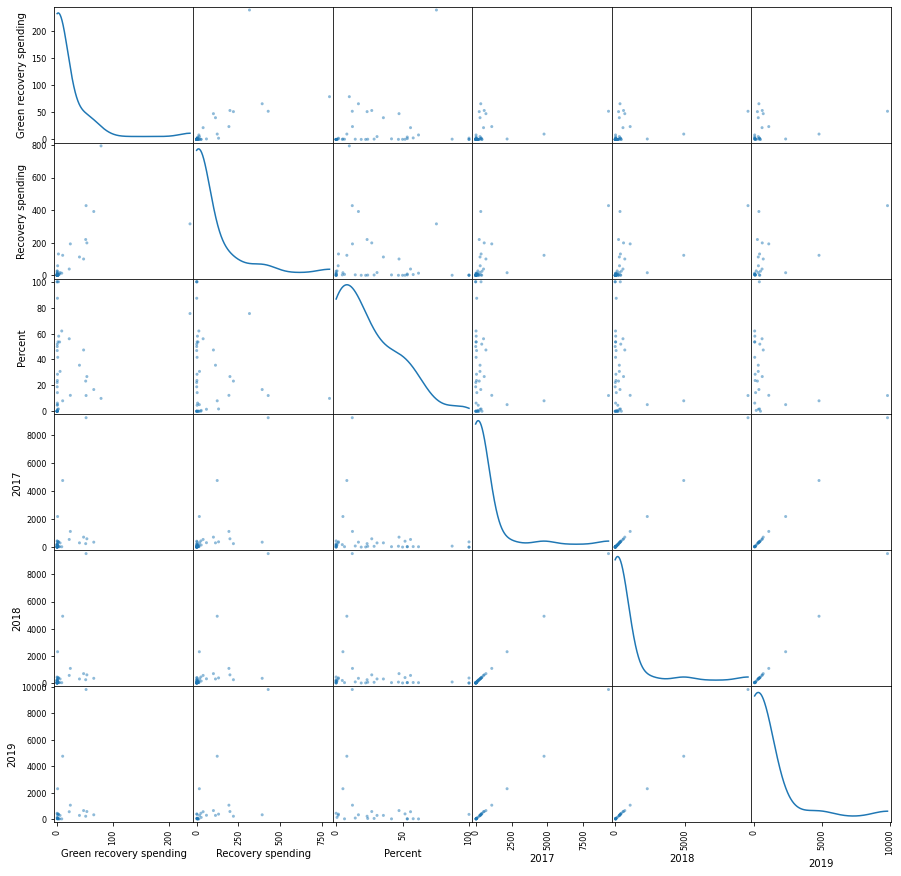

In [30]:
from pandas.plotting import scatter_matrix

scatter_matrix(GROmerge, alpha=0.5, diagonal='kde', figsize=(15,15))

In [31]:
corr = GROmerge.corr(method='pearson')
corr

,Green recovery spending,Recovery spending,Percent,2017,2018,2019
Green recovery spending,1.000000,0.651449,0.172324,0.388320,0.383644,0.316716
Recovery spending,0.651449,1.000000,-0.121912,0.629610,0.625323,0.593345
Percent,0.172324,-0.121912,1.000000,-0.159214,-0.159712,-0.255644
2017,0.388320,0.629610,-0.159214,1.000000,0.999936,0.999629
2018,0.383644,0.625323,-0.159712,0.999936,1.000000,0.999659
2019,0.316716,0.593345,-0.255644,0.999629,0.999659,1.000000


<AxesSubplot:>

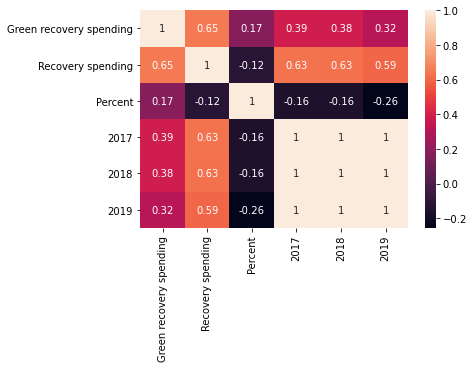

In [32]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
